### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐 : 무게
- 라벨/타겟 : 길이
- 학습방법 : 지도학습 + 예측 => KNN 기반의 회귀
- 학습/테스트 데이터 : 7:3 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
fishDF = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
perchDF = fishDF[fishDF['Species'] == 'Perch'].reset_index(drop=True)
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


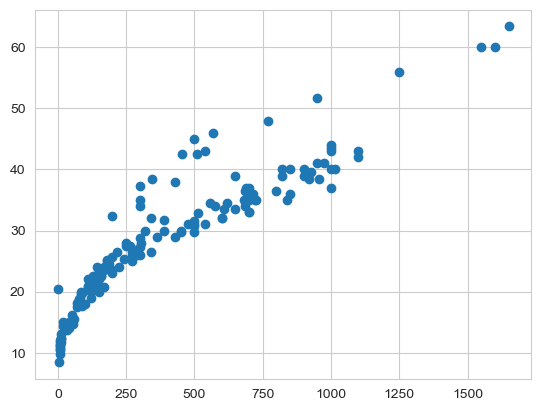

In [3]:
plt.scatter(fishDF['Weight'], fishDF['Length'])
plt.show()

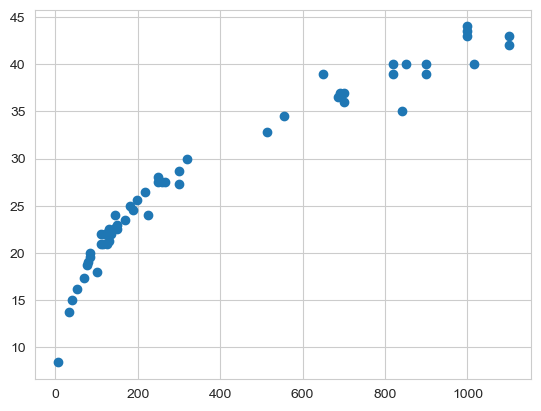

In [4]:
plt.scatter(perchDF['Weight'], perchDF['Length'])
plt.show()

In [5]:
featureDF = fishDF[['Weight']]
targetDF = fishDF['Length']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.3)

X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
                                                    test_size=0.1)

In [7]:
# scaler = StandardScaler()
# scaler.fit(X_train)

In [8]:
model = KNeighborsRegressor()

In [9]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [10]:
model.score(X_val, y_val)

0.7771538750540515

In [11]:
model.predict(X_test)

array([37.3 , 22.4 , 21.8 , 20.6 , 21.8 , 34.8 , 18.78, 13.38, 11.46,
       24.78, 32.64, 25.8 , 25.8 , 38.08, 14.42, 22.4 , 30.86, 35.7 ,
       38.68, 22.4 , 22.52, 35.7 , 21.8 , 19.04, 56.28, 33.5 , 35.6 ,
       14.74, 42.34, 22.06, 32.78, 42.34, 33.08, 29.26, 34.2 , 34.8 ,
       30.86, 15.1 , 23.8 , 29.24, 27.4 , 26.4 , 38.  , 26.48, 18.9 ,
       33.08, 21.3 , 21.76])

In [12]:
r2_score(y_test, model.predict(X_test))

0.8803664456877012

In [13]:
mean_squared_error(y_test, model.predict(X_test))

12.686083333333336

In [14]:
mean_absolute_error(y_test, model.predict(X_test))

2.224166666666667

In [15]:
# K = default(5), 100번 시행
scoreDict = {'index':['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(100):
    scoreDict[f'trial {i}'] = []
    X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.3)
    
    X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
                                                    test_size=0.1)
    
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict[f'trial {i}'].extend([model.score(X_val, y_val),
                        model.score(X_test, y_test),
                        r2_score(y_test, predict),
                        mean_squared_error(y_test, predict),
                        mean_absolute_error(y_test, predict)])
    
    print(f'trial {i} ::\n'
          f'val_score = {scoreDict[f"trial {i}"][0]}\n'
          f'test_score= {scoreDict[f"trial {i}"][1]}\n'
          f'r2_score  = {scoreDict[f"trial {i}"][2]}\n'
          f'MSE       = {scoreDict[f"trial {i}"][3]}\n'
          f'MAE       = {scoreDict[f"trial {i}"][4]}\n\n')

trial 0 ::
val_score = 0.912660269879068
test_score= 0.9328838237021972
r2_score  = 0.9328838237021972
MSE       = 8.895716666666667
MAE       = 1.945


trial 1 ::
val_score = 0.7673475437448349
test_score= 0.8923303209167852
r2_score  = 0.8923303209167852
MSE       = 11.024316666666666
MAE       = 1.8291666666666664


trial 2 ::
val_score = 0.7830917715275619
test_score= 0.8908126546617429
r2_score  = 0.8908126546617429
MSE       = 11.9501
MAE       = 2.2024999999999997


trial 3 ::
val_score = 0.888317605800026
test_score= 0.9175018490740664
r2_score  = 0.9175018490740664
MSE       = 7.024974999999995
MAE       = 1.7962499999999995


trial 4 ::
val_score = 0.7970615150342936
test_score= 0.8896042986640287
r2_score  = 0.8896042986640287
MSE       = 14.176666666666671
MAE       = 2.4341666666666675


trial 5 ::
val_score = 0.9503418922998755
test_score= 0.9029521161597038
r2_score  = 0.9029521161597038
MSE       = 12.03261666666667
MAE       = 2.2266666666666666


trial 6 ::
val_score 

In [16]:
# 시행 결과 데이터프레임에 담기
scoreDF = pd.DataFrame(scoreDict)
scoreDF.set_index('index', inplace=True)
scoreDF.T

index,val_score,test_score,r2_score,MSE,MAE
trial 0,0.912660,0.932884,0.932884,8.895717,1.945000
trial 1,0.767348,0.892330,0.892330,11.024317,1.829167
trial 2,0.783092,0.890813,0.890813,11.950100,2.202500
trial 3,0.888318,0.917502,0.917502,7.024975,1.796250
trial 4,0.797062,0.889604,0.889604,14.176667,2.434167
...,...,...,...,...,...
trial 95,0.927285,0.912449,0.912449,8.323858,1.901250
trial 96,0.909749,0.884595,0.884595,11.205067,2.141667
trial 97,0.788066,0.911257,0.911257,10.120425,2.275417
trial 98,0.768111,0.955442,0.955442,4.430042,1.473750


In [17]:
scoreDF.T.describe()

index,val_score,test_score,r2_score,MSE,MAE
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.859804,0.909032,0.909032,10.300127,2.095367
std,0.067586,0.023314,0.023314,2.781908,0.271026
min,0.612136,0.859208,0.859208,3.646242,1.442917
25%,0.822607,0.891998,0.891998,8.359533,1.926458
50%,0.870287,0.911005,0.911005,10.333042,2.117083
75%,0.911739,0.924614,0.924614,11.999867,2.279896
max,0.974228,0.970465,0.970465,16.826617,2.708750


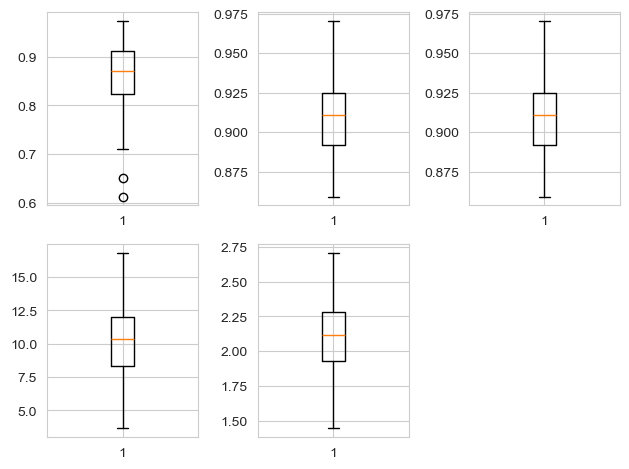

In [18]:
for i, col in enumerate(scoreDF.T.columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(scoreDF.T[col])
plt.tight_layout()
plt.show()

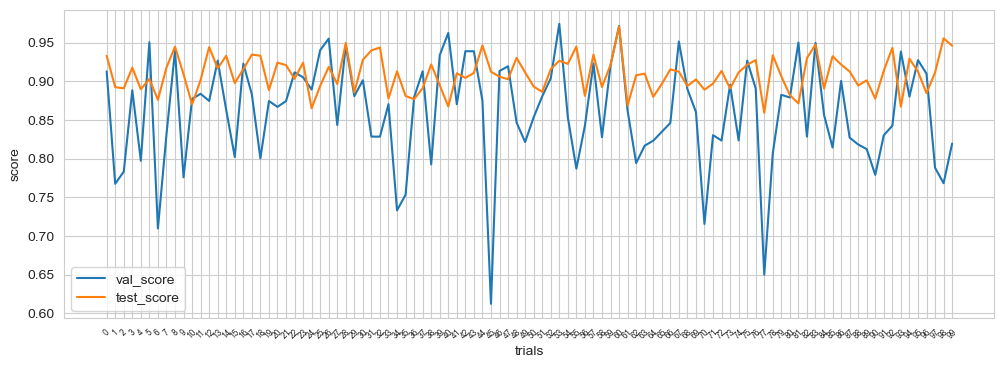

In [19]:
plt.figure(figsize=(12,4))
plt.plot(scoreDF.loc['val_score'], label='val_score')
plt.plot(scoreDF.loc['test_score'], label='test_score')
plt.xticks(ticks=scoreDF.columns, labels=[i.split(' ')[1] for i in scoreDF.columns], rotation=45, fontsize=6)
plt.xlabel('trials')
plt.ylabel('score')
plt.legend()
plt.show()

In [20]:
# K가 1에서 최대일 때 시행
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                test_size=0.3)

X_train, X_val, y_train, y_val = train_test_split(featureDF, targetDF,
                                                test_size=0.1)

scoreDict2 = {'index':['val_score', 'test_score', 'r2_score', 'MSE', 'MAE']}
for i in range(len(X_train)):
    scoreDict2[f'K={i}'] = []
    
    model = KNeighborsRegressor(n_neighbors=i+1)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    scoreDict2[f'K={i}'].extend([model.score(X_val, y_val),
                        model.score(X_test, y_test),
                        r2_score(y_test, predict),
                        mean_squared_error(y_test, predict),
                        mean_absolute_error(y_test, predict)])
    
    print(f'K={i} ::\n'
          f'val_score = {scoreDict2[f"K={i}"][0]}\n'
          f'test_score= {scoreDict2[f"K={i}"][1]}\n'
          f'r2_score  = {scoreDict2[f"K={i}"][2]}\n'
          f'MSE       = {scoreDict2[f"K={i}"][3]}\n'
          f'MAE       = {scoreDict2[f"K={i}"][4]}\n\n')

K=0 ::
val_score = 0.8458426376379397
test_score= 0.9415147098351286
r2_score  = 0.9415147098351286
MSE       = 8.276666666666666
MAE       = 1.1291666666666667


K=1 ::
val_score = 0.8738140045065823
test_score= 0.9285285699371505
r2_score  = 0.9285285699371505
MSE       = 10.114427083333334
MAE       = 2.0656250000000003


K=2 ::
val_score = 0.8954592179896399
test_score= 0.9322936978915112
r2_score  = 0.9322936978915112
MSE       = 9.581597222222223
MAE       = 2.0326388888888887


K=3 ::
val_score = 0.9250766958875641
test_score= 0.9318431915173168
r2_score  = 0.9318431915173168
MSE       = 9.645351562499998
MAE       = 1.9213541666666665


K=4 ::
val_score = 0.944160582555331
test_score= 0.9161397961548365
r2_score  = 0.9161397961548365
MSE       = 11.867649999999998
MAE       = 2.1008333333333327


K=5 ::
val_score = 0.9583951217002808
test_score= 0.9072565968253485
r2_score  = 0.9072565968253485
MSE       = 13.124774305555562
MAE       = 2.351736111111111


K=6 ::
val_score = 0.

In [21]:
# 시행 결과 데이터프레임에 담기
scoreDF2 = pd.DataFrame(scoreDict2)
scoreDF2 = scoreDF2.set_index('index').T
scoreDF2

index,val_score,test_score,r2_score,MSE,MAE
K=0,0.845843,0.941515,0.941515,8.276667,1.129167
K=1,0.873814,0.928529,0.928529,10.114427,2.065625
K=2,0.895459,0.932294,0.932294,9.581597,2.032639
K=3,0.925077,0.931843,0.931843,9.645352,1.921354
K=4,0.944161,0.916140,0.916140,11.867650,2.100833
...,...,...,...,...,...
K=138,-0.227375,0.044487,0.044487,135.221440,8.939553
K=139,-0.257267,0.028793,0.028793,137.442317,9.024940
K=140,-0.286925,0.014256,0.014256,139.499605,9.087677
K=141,-0.317319,-0.001218,-0.001218,141.689487,9.153932


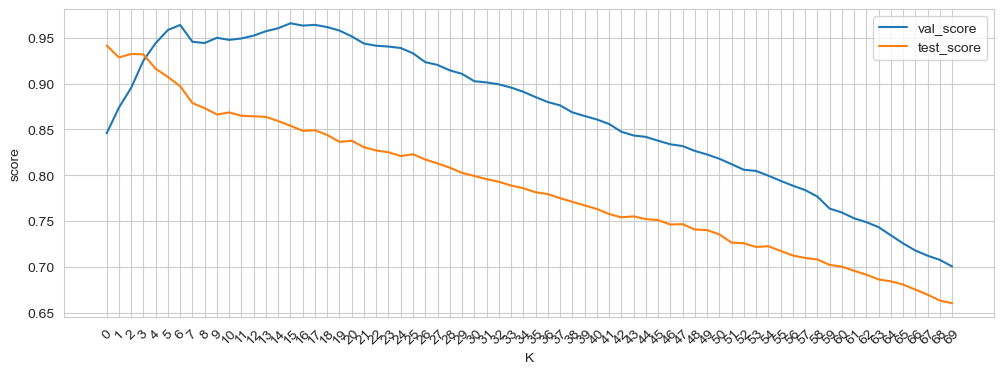

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(scoreDF2.iloc[:70]['val_score'], label='val_score')
plt.plot(scoreDF2.iloc[:70]['test_score'], label='test_score')
plt.xticks(ticks=scoreDF2.index[:70], labels=[i.split('=')[1] for i in scoreDF2.index[:70]], rotation=45)
plt.xlabel('K')
plt.ylabel('score')
plt.legend()
plt.show()

In [23]:
scoreDF2.describe()

index,val_score,test_score,r2_score,MSE,MAE
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.549738,0.569866,0.569866,60.871306,4.965494
std,0.379869,0.260179,0.260179,36.819770,2.067142
min,-0.350424,-0.013173,-0.013173,8.276667,1.129167
25%,0.256229,0.367614,0.367614,31.053436,3.230793
50%,0.690557,0.649280,0.649280,49.632892,4.228009
75%,0.875041,0.780568,0.780568,89.493416,6.754563
max,0.965732,0.941515,0.941515,143.381262,9.209266


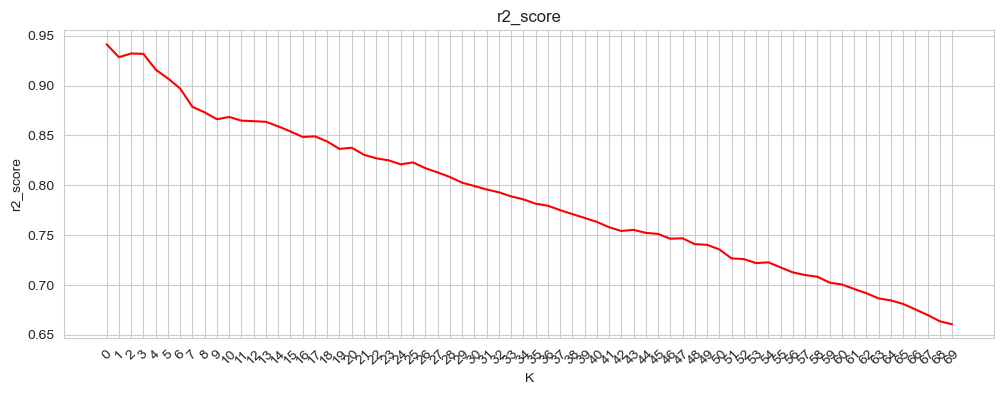

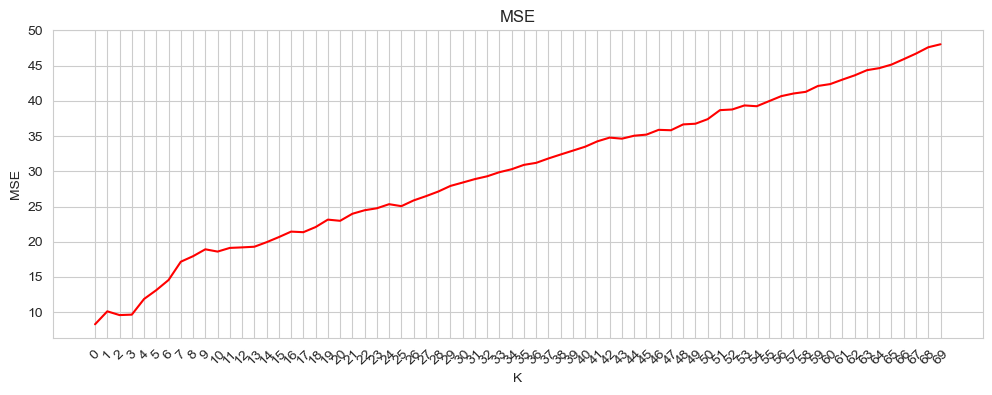

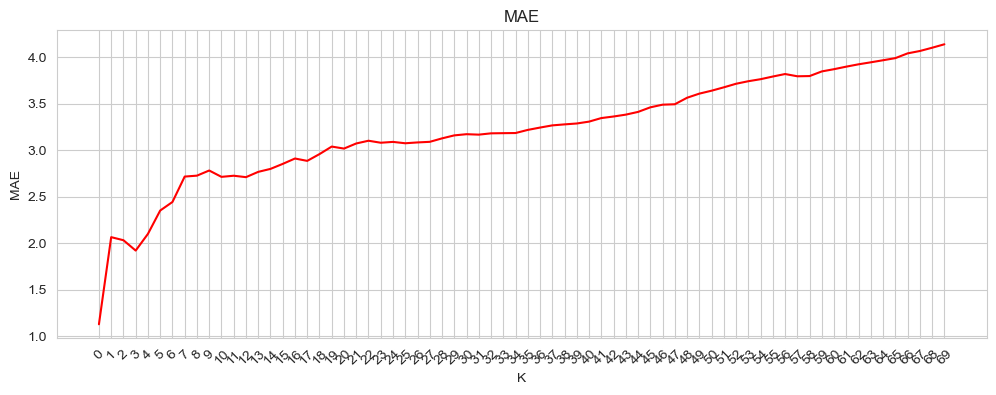

In [30]:
for col in scoreDF2.columns[2:]:
    plt.figure(figsize=(12, 4))
    plt.plot(scoreDF2[col][:70], label=col, color='red')
    plt.xticks(ticks=scoreDF2.index[:70], labels=[i.split('=')[1] for i in scoreDF2.index[:70]], rotation=45)
    plt.title(col)
    plt.xlabel('K')
    plt.ylabel(col)
    plt.show()